# EDA

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# 경로 설정
#os.chdir('./data')
#os.getcwd()

## **1:데이터 확인**
- train.csv 총 데이터 9324개
- dev_pd : 550개
- test_pd : 1100개
- null값 없음

In [3]:
train_pd = pd.read_csv("train.csv")
dev_pd = pd.read_csv("dev.csv")
test_pd = pd.read_csv("test.csv")

print(train_pd.info(),end='\n\n')
print(dev_pd.info(),end='\n\n')
print(test_pd.info(),end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9324 entries, 0 to 9323
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9324 non-null   object 
 1   source        9324 non-null   object 
 2   sentence_1    9324 non-null   object 
 3   sentence_2    9324 non-null   object 
 4   label         9324 non-null   float64
 5   binary-label  9324 non-null   float64
dtypes: float64(2), object(4)
memory usage: 437.2+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            550 non-null    object 
 1   source        550 non-null    object 
 2   sentence_1    550 non-null    object 
 3   sentence_2    550 non-null    object 
 4   label         550 non-null    float64
 5   binary-label  550 non-null    float64
dtypes: float64(2), object(4)
memory usage

In [4]:
train_pd

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0


#### **1-1 :중복데이터 확인** :   
'sentence_2'에서 총 3개가 중복되지만 'sentence_1'과 합쳐서 확인해 본 결과, 내용과 겹치지 않으므로 유의미한 데이터로 판단

In [5]:
train_pd[train_pd.duplicated('sentence_2',keep=False)]

,id,source,sentence_1,sentence_2,label,binary-label
173,boostcamp-sts-v1-train-173,slack-rtt,다음에 다시 재밌는 이야기해요!,다음에 또 즐겁게 이야기합시다!,3.6,1.0
601,boostcamp-sts-v1-train-601,slack-rtt,다음에 또 뵈어요!,다음에 만나요!,4.0,1.0
4523,boostcamp-sts-v1-train-4523,petition-rtt,청소년보호법 폐지요,청소년보호법 폐지해주세요,4.0,1.0
4706,boostcamp-sts-v1-train-4706,petition-rtt,청소년 보호법 폐지 부탁드립니다,청소년보호법 폐지해주세요,4.2,1.0
6540,boostcamp-sts-v1-train-6540,slack-rtt,다음에 또 즐겁게 이야기 나누어요!,다음에 또 즐겁게 이야기합시다!,4.4,1.0
8520,boostcamp-sts-v1-train-8520,slack-rtt,다음에 꼭 뵈어요!,다음에 만나요!,3.4,1.0


In [6]:
train_pd.duplicated(['sentence_1', 'sentence_2']).sum()

0

### **2 : LABEL 분포**

- bar chart : label을 범주형 변수로.
- train : label 0인 데이터가 2,119개(22.7%)

- Train,Dev,Tes데이터는 균일하고 랜던한 분포를 가져야함 :   
 dev데이터는 분포가 고른편, 하지만 train데이터는 0점에 쏠린 데이터   

- label 0인 데이터를 줄이거나, 특정 라벨을 늘리거나, 모든 label의 데이터 수를 고르게 뽑아서 데이터 분포가 고른 데이터셋 구축하는 것을 제시.

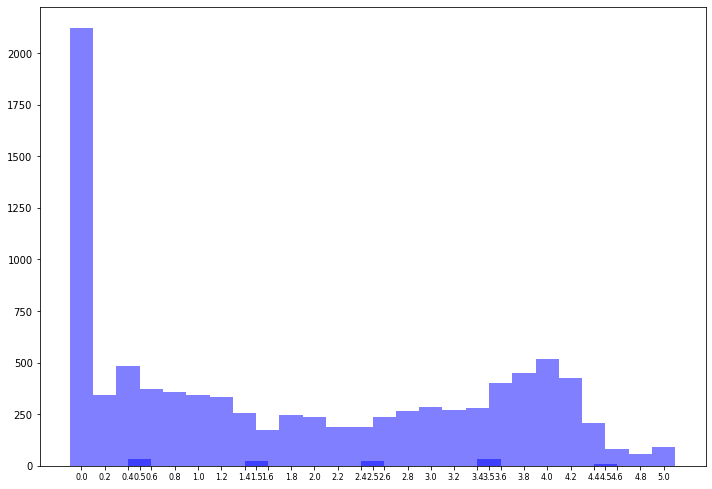

In [7]:
feature = train_pd['label']

plt.figure(figsize=(10,7.5))
#plt.title('Label Count', fontsize=20)

temp = feature.value_counts()
plt.bar(temp.keys(), temp.values, width=0.2, color='b', alpha=0.5)
plt.xticks(temp.keys(), fontsize=8) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기
# label == 0 :: 2119

In [8]:
# explode = [0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] ## 튀어나오는 정도를 결정한다.
# plt.pie(train_pd['label'].value_counts(), ## 파이차트 출력
#         labels=train_pd['label'].value_counts().index, ## 라벨 출력
#         startangle=90,  ## 시작점을 90도(degree)로 지정
#         autopct = '%.1f%%',  #퍼센티지 출력
#         explode = explode,## 튀어나오게한다.
#         )


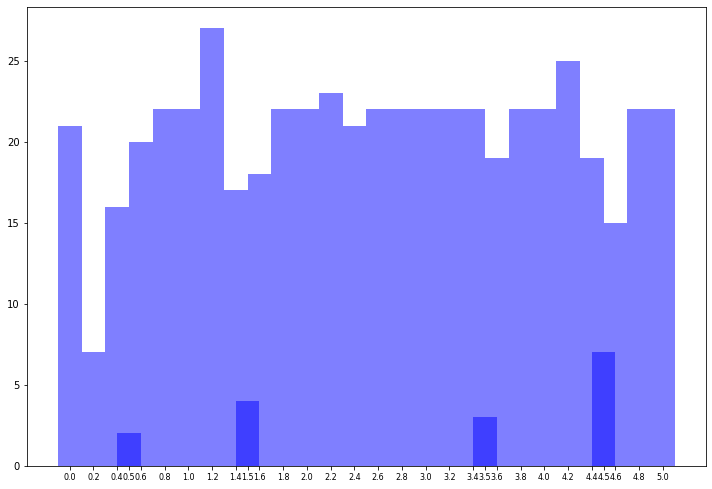

In [9]:
feature = dev_pd['label']

plt.figure(figsize=(10,7.5))
#plt.title('Label Count', fontsize=20)

temp = feature.value_counts()  
plt.bar(temp.keys(), temp.values, width=0.2, color='b', alpha=0.5)
plt.xticks(temp.keys(), fontsize=8) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

### **3 : Source 분포**

 - dev데이터 source의 비율은 train과 같음

 - Source별 문장의 차이는 없는 것으로 보임.
 
> NSMC (네이버 영화 감성 분석 코퍼스, Naver Sentiment Movie Corpus) : 구어체   
> slack (업스테이지(Upstage) 슬랙 데이터) : <\/PERSON> 이라는 단어가 자주 등장하는데, 개인정보로 추측됨   
> petition (국민청원 게시판 제목 데이터) : 주장하거나 요청하는 문체를 사용함

- rtt 데이터는 Round Trip translation(한국어 -> 영어 -> 한국어)으로 추론됨(by_최동민_T4218)   
 > 확인 결과, rtt는 'sentence_1'을 **google번역기**로 (한국어 -> 영어 -> 한국어) 실행하여 'sentence_2'로 저장하고 라벨링 한 것으로 보임.   
 > 그래서 rtt데이터들은 label이 5점으로 치우친 데이터 분포를 보이는 것으로 추측됨

 - 유의미한 인사이트를 도출하지 못함

([<matplotlib.patches.Wedge at 0x2a81a8c2c50>,
 [Text(-0.7833015107170367, 0.7722944667083976, 'nsmc-sampled'),
  Text(-0.775980774956586, -0.7796498168394426, 'slack-rtt'),
  Text(0.6852590866774975, -0.8604766028927935, 'petition-sampled'),
  Text(1.0897742814501923, 0.14963961871682735, 'slack-sampled'),
  Text(0.793895228753955, 0.7614002664576008, 'nsmc-rtt'),
  Text(0.2886370396316437, 1.0614559149360285, 'petition-rtt')],
 [Text(-0.534069211852525, 0.526564409119362, '25.2%'),
  Text(-0.5290778011067632, -0.5315794205723472, '24.6%'),
  Text(0.46722210455283913, -0.58668859288145, '21.7%'),
  Text(0.7430279191705855, 0.10202701276147319, '11.2%'),
  Text(0.5412922014231512, 0.5191365453120005, '8.8%'),
  Text(0.1967979815670298, 0.7237199420018375, '8.5%')])

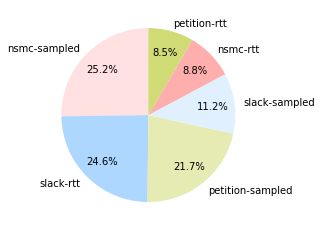

In [10]:
my_colours =['#ffe1e1','#aed7ff','#e5ebb2','#e1f0ff','#ffaeae','#d0db76']
plt.pie(train_pd['source'].value_counts(),labels=train_pd['source'].unique(),startangle=90,autopct='%.1f%%',pctdistance=0.75,colors = my_colours)

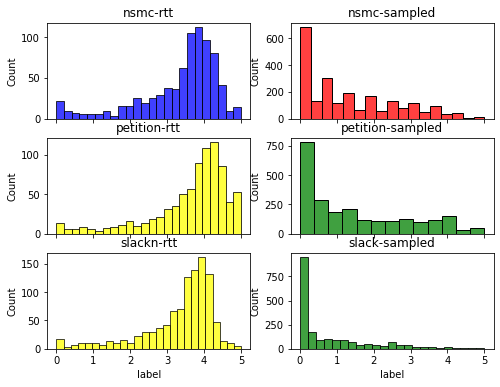

In [11]:
f, axes = plt.subplots(3, 2, figsize=(8, 6), sharex=True)

a = sns.histplot(train_pd[train_pd['source']=='nsmc-rtt']['label'], color="blue", ax=axes[0, 0])
b = sns.histplot(train_pd[train_pd['source']=='nsmc-sampled']['label'], color="red", ax=axes[0, 1])
a.set_title('nsmc-rtt')
b.set_title('nsmc-sampled')

c = sns.histplot(train_pd[train_pd['source']=='petition-rtt']['label'], color="yellow", ax=axes[1, 0])
d = sns.histplot(train_pd[train_pd['source']=='petition-sampled']['label'], color="green", ax=axes[1, 1])
c.set_title('petition-rtt')
d.set_title('petition-sampled')

e = sns.histplot(train_pd[train_pd['source']=='slack-rtt']['label'], color="yellow", ax=axes[2, 0])
f = sns.histplot(train_pd[train_pd['source']=='slack-sampled']['label'], color="green", ax=axes[2, 1])
e.set_title('slackn-rtt')
f.set_title('slack-sampled')

plt.show()

([<matplotlib.patches.Wedge at 0x2a81aa731f0>,
 [Text(-0.7297966338600793, 0.8230412342079207, 'nsmc-sampled'),
  Text(-0.9044577722670107, -0.6260640048635573, 'slack-rtt'),
  Text(0.35184764855444955, -1.0422107427035594, 'petition-sampled'),
  Text(1.0780908383980825, -0.21844940870169383, 'slack-sampled'),
  Text(0.8749149832544059, 0.6667261597364715, 'nsmc-rtt'),
  Text(0.297828404853764, 1.0589137081284115, 'petition-rtt')],
 [Text(-0.4975886139955086, 0.5611644778690369, '23.1%'),
  Text(-0.6166757538184164, -0.42686182149788, '23.1%'),
  Text(0.23989612401439742, -0.7105982336615178, '18.0%'),
  Text(0.7350619352714198, -0.1489427786602458, '15.3%'),
  Text(0.596532943128004, 0.4545860180021396, '11.8%'),
  Text(0.20306482149120272, 0.7219866191784623, '8.7%')])

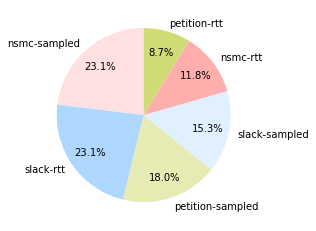

In [12]:
my_colours =['#ffe1e1','#aed7ff','#e5ebb2','#e1f0ff','#ffaeae','#d0db76']
plt.pie(dev_pd['source'].value_counts(),labels=train_pd['source'].unique(),startangle=90,autopct='%.1f%%',pctdistance=0.75,colors = my_colours)

# dev데이터 source의 비율은 train과 같음

In [13]:
# train_pd[train_pd['source']=='nsmc-sampled']

In [14]:
# train_pd[train_pd['source']=='slack-sampled']

In [15]:
# train_pd[train_pd['source']=='petition-sampled']

In [16]:
# train_pd[train_pd['source']=='nsmc-rtt']

In [17]:
# train_pd[train_pd['source']=='slack-rtt']

In [18]:
# train_pd[train_pd['source']=='petition-rtt']

### **4 : binary-label 분포**

- rtt데이터가 binary-label 1의 비중이 높고, sampled데이터는 binary-label 0의 비중이 높다.
- 1-2 : Source 분포와 마찬가지로 유의미한 인사이트를 도출하지 못함

([<matplotlib.patches.Wedge at 0x2a81834b040>,
 [Text(-1.0344203444877802, -0.3741317293544912, '0.0'),
  Text(1.0344203444877802, 0.37413172935449107, '1.0')],
 [Text(-0.7052865985143956, -0.25508981546897125, '61.0%'),
  Text(0.7052865985143956, 0.25508981546897114, '39.0%')])

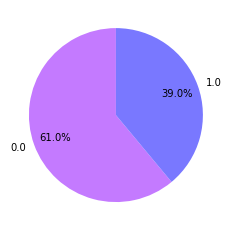

In [19]:
my_colours =['#c47aff','#7978ff']
plt.pie(train_pd['binary-label'].value_counts(),labels=train_pd['binary-label'].unique(),startangle=90,autopct='%.1f%%',pctdistance=0.75,colors = my_colours)

- ['binary-label']==0인 데이터 source 분포

In [20]:
train_pd[train_pd['binary-label']==0]['source'].value_counts().sort_values().keys()

Index(['petition-rtt', 'nsmc-rtt', 'slack-rtt', 'petition-sampled',
       'slack-sampled', 'nsmc-sampled'],
      dtype='object')

In [21]:
train_pd[train_pd['binary-label']==0]['source'].value_counts().sort_values()

petition-rtt         110
nsmc-rtt             141
slack-rtt            169
petition-sampled    1719
slack-sampled       1762
nsmc-sampled        1791
Name: source, dtype: int64

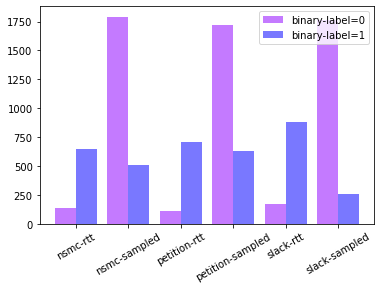

In [22]:
topics = train_pd['source'].unique()
value_a = train_pd[train_pd['binary-label']==0]['source'].value_counts().sort_values()
value_b = train_pd[train_pd['binary-label']==1]['source'].value_counts().sort_values()

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]
value_a_x = create_x(2, 0.8, 1, 6)
value_b_x = create_x(2, 0.8, 2, 6)

ax = plt.subplot()
ax.bar(value_a_x, value_a.sort_index(),label ='binary-label=0',color = '#c47aff')
ax.bar(value_b_x, value_b.sort_index(),label ='binary-label=1',color = '#7978ff')
middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]
ax.set_xticks(middle_x)
ax.set_xticklabels(value_a.sort_index().keys(),rotation=30)
plt.legend(loc='upper right')
plt.show()

### **5 : 문장 길이 확인**

#### **5-1 : train data 문장 길이 확인**
- sentence_1와 sentence_2의 평균 문장 길이는 23자, 10~25사이로 몰려있는 분포를 보임.
- source별 문장 길이를 살펴봤을 때, 왼쪽으로 치우친 분포로 모두 비슷한 양상을 띄고 있음.

In [23]:
max_len = np.max(train_pd['sentence_1'].str.len())
min_len = np.min(train_pd['sentence_1'].str.len())
mean_len = np.mean(train_pd['sentence_1'].str.len())

print('Max sentence_1 Length: ', max_len)
print('Min sentence_1 Length: ', min_len)
print('Mean sentence_1 Lenght: ', mean_len, '\n')

max_len = np.max(train_pd['sentence_2'].str.len())
min_len = np.min(train_pd['sentence_2'].str.len())
mean_len = np.mean(train_pd['sentence_2'].str.len())

print('Max sentence_2 Length: ', max_len)
print('Min sentence_2 Length: ', min_len)
print('Mean sentence_2 Lenght: ', mean_len)

Max sentence_1 Length:  98
Min sentence_1 Length:  9
Mean sentence_1 Lenght:  23.258151008151007 

Max sentence_2 Length:  114
Min sentence_2 Length:  5
Mean sentence_2 Lenght:  23.726404976404975


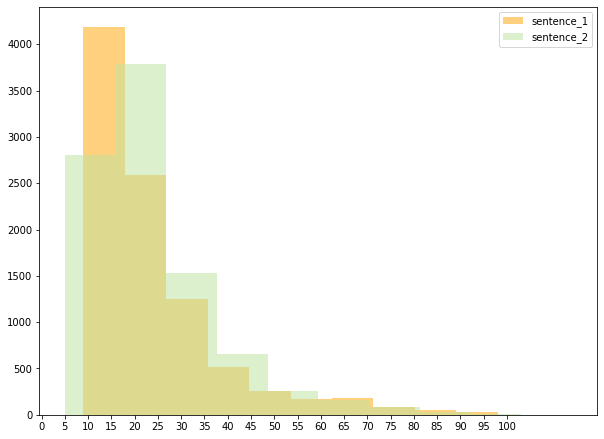

In [24]:
from collections import Counter
xtick = [i*5 for i in range(21)]
plt.figure(figsize=(10,7.5))
plt.hist(train_pd['sentence_1'].str.len(), alpha=0.5, color='orange',label = 'sentence_1')
plt.hist(train_pd['sentence_2'].str.len(), alpha=0.5, color='#bce29e',label = 'sentence_2')
plt.xticks(xtick)
plt.legend()
#plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정

plt.show()

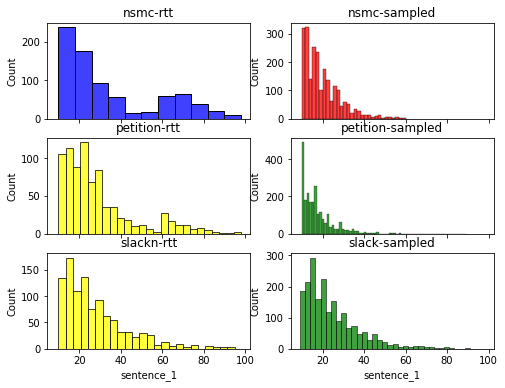

In [25]:
f, axes = plt.subplots(3, 2, figsize=(8, 6), sharex=True)

a = sns.histplot(train_pd[train_pd['source']=='nsmc-rtt']['sentence_1'].str.len(), color="blue", ax=axes[0, 0])
b = sns.histplot(train_pd[train_pd['source']=='nsmc-sampled']['sentence_1'].str.len(), color="red", ax=axes[0, 1])
a.set_title('nsmc-rtt')
b.set_title('nsmc-sampled')

c = sns.histplot(train_pd[train_pd['source']=='petition-rtt']['sentence_1'].str.len(), color="yellow", ax=axes[1, 0])
d = sns.histplot(train_pd[train_pd['source']=='petition-sampled']['sentence_1'].str.len(), color="green", ax=axes[1, 1])
c.set_title('petition-rtt')
d.set_title('petition-sampled')

e = sns.histplot(train_pd[train_pd['source']=='slack-rtt']['sentence_1'].str.len(), color="yellow", ax=axes[2, 0])
f = sns.histplot(train_pd[train_pd['source']=='slack-sampled']['sentence_1'].str.len(), color="green", ax=axes[2, 1])
e.set_title('slackn-rtt')
f.set_title('slack-sampled')

plt.show()

In [26]:
# f, axes = plt.subplots(3, 2, figsize=(8, 6), sharex=True)

# a = sns.histplot(train_pd[train_pd['source']=='nsmc-rtt']['sentence_2'].str.len(), color="blue", ax=axes[0, 0])
# b = sns.histplot(train_pd[train_pd['source']=='nsmc-sampled']['sentence_2'].str.len(), color="red", ax=axes[0, 1])
# a.set_title('nsmc-rtt')
# b.set_title('nsmc-sampled')

# c = sns.histplot(train_pd[train_pd['source']=='petition-rtt']['sentence_2'].str.len(), color="yellow", ax=axes[1, 0])
# d = sns.histplot(train_pd[train_pd['source']=='petition-sampled']['sentence_2'].str.len(), color="green", ax=axes[1, 1])
# c.set_title('petition-rtt')
# d.set_title('petition-sampled')

# e = sns.histplot(train_pd[train_pd['source']=='slack-rtt']['sentence_2'].str.len(), color="yellow", ax=axes[2, 0])
# f = sns.histplot(train_pd[train_pd['source']=='slack-sampled']['sentence_2'].str.len(), color="green", ax=axes[2, 1])
# e.set_title('slackn-rtt')
# f.set_title('slack-sampled')

# plt.show()

#### **5-2 : dev data 문장 길이 확인**

- dev 데이터의 문장 길이도 대체적으로 10~25로 몰려있는 데이터 분포를 보임
- dev 데이터의 문장 길이 분포와 train 데이터의 문장 길이 분포는 대체적으로 유사한 분포를 보임

In [27]:
max_len = np.max(dev_pd['sentence_1'].str.len())
min_len = np.min(dev_pd['sentence_1'].str.len())
mean_len = np.mean(dev_pd['sentence_1'].str.len())

print('Max sentence_1 Length: ', max_len)
print('Min sentence_1 Length: ', min_len)
print('Mean sentence_1 Lenght: ', mean_len, '\n')

max_len = np.max(dev_pd['sentence_2'].str.len())
min_len = np.min(dev_pd['sentence_2'].str.len())
mean_len = np.mean(dev_pd['sentence_2'].str.len())

print('Max sentence_2 Length: ', max_len)
print('Min sentence_2 Length: ', min_len)
print('Mean sentence_2 Lenght: ', mean_len)

Max sentence_1 Length:  97
Min sentence_1 Length:  10
Mean sentence_1 Lenght:  23.381818181818183 

Max sentence_2 Length:  104
Min sentence_2 Length:  6
Mean sentence_2 Lenght:  24.167272727272728


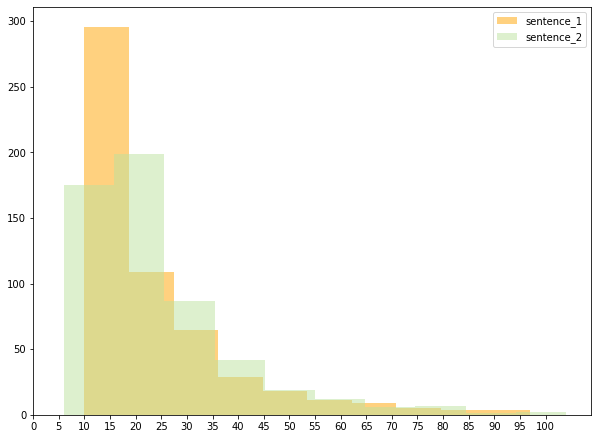

In [28]:
from collections import Counter
xtick = [i*5 for i in range(21)]
plt.figure(figsize=(10,7.5))
plt.hist(dev_pd['sentence_1'].str.len(), alpha=0.5, color='orange',label = 'sentence_1')
plt.hist(dev_pd['sentence_2'].str.len(), alpha=0.5, color='#bce29e',label = 'sentence_2')
plt.xticks(xtick)
plt.legend()
#plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정

plt.show()

---